# Fitting Function in SciPy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

<ErrorbarContainer object of 3 artists>

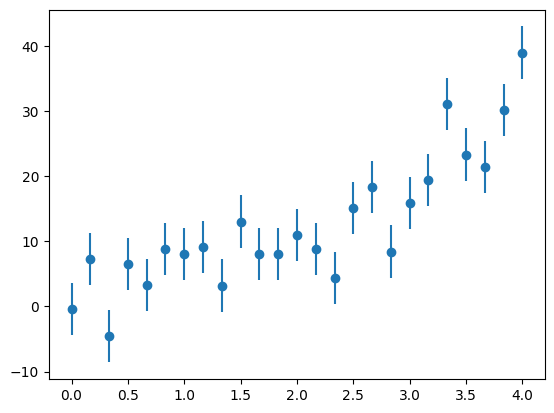

In [4]:
# make up some experimental data
a0 = 2.5
a1 = 2./3.
sigma = 4.0

N = 25

x = np.linspace(0.0, 4.0, N)

rng = np.random.default_rng()
r = sigma * rng.standard_normal(N)

y = a0 * np.exp(a1 * x) + r
yerr = sigma * np.ones_like(r)

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=yerr, fmt="o")

In [5]:
def resid(avec, x, y, yerr):
    """ the residual function -- this is what will be minimized by the
        scipy.optimize.leastsq() routine.  avec is the parameters we
        are optimizing -- they are packed in here, so we unpack to
        begin.  (x, y) are the data points 

        scipy.optimize.leastsq() minimizes:

           x = arg min(sum(func(y)**2,axis=0))
                    y

        so this should just be the distance from a point to the curve,
        and it will square it and sum over the points
        """

    a0, a1 = avec

    # note: if we wanted to deal with error bars, we would weight each
    # residual accordingly
    return (y - a0 * np.exp(a1 * x)) / yerr

In [6]:
# initial guesses
a0 = 0.5
a1 = 0.5

# fit -- here the args is a tuple of objects that will be added to the
# argument lists for the function to be minimized (resid in our case)
afit, flag = optimize.leastsq(resid, [a0, a1], args=(x, y, yerr))

print(flag)
print(afit)

1
[2.5744586  0.64840682]


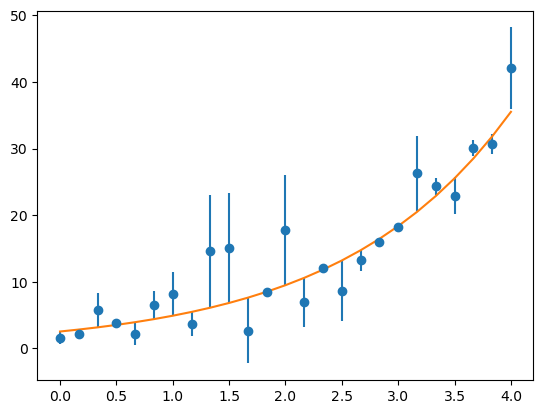

In [5]:
ax.plot(x, afit[0] * np.exp(afit[1] * x))
fig